In [1]:
import keras
keras.__version__

'3.8.0'

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os, shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
# !unzip drive/MyDrive/W/kagglecatsanddogs_5340.zip

In [7]:
# to_del = ['validation', 'train', 'test']

# for x in to_del:
#   shutil.rmtree(x)

In [8]:
original_dataset_dir = 'PetImages'
base_dir = ''

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'Cat')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'Dog')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'Cat')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'Dog')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'Cat')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'Dog')
os.mkdir(test_dogs_dir)

In [9]:
# Copy first 1000 cat images to train_cats_dir
fnames = ['Cat/{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['Cat/{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to test_cats_dir
fnames = ['Cat/{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

# Copy first 1000 dog images to train_dogs_dir
fnames = ['Dog/{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 dog images to validation_dogs_dir
fnames = ['Dog/{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 dog images to test_dogs_dir
fnames = ['Dog/{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
def check_images_in_directory(directory_path):
    problematic_files = []

    # Получаем список всех файлов в директории
    for subdir in os.listdir(directory_path):
        subdir_path = os.path.join(directory_path, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, filename)
                try:
                    # Попробуем загрузить изображение
                    img = load_img(file_path)
                    img_array = img_to_array(img)
                except Exception as e:
                    # Если возникает ошибка, добавляем файл в список проблемных
                    problematic_files.append(file_path)

    return problematic_files

train_problematic_files = check_images_in_directory(train_dir)
validation_problematic_files = check_images_in_directory(validation_dir)
test_problematic_files = check_images_in_directory(test_dir)

if train_problematic_files:
    print("Удалите файл:", end=' ')
    for file in train_problematic_files:
        print(file)
else:
    print("train Успех!")

if validation_problematic_files:
    print("Удалите файл:", end=' ')
    for file in validation_problematic_files:
        print(file)
else:
    print("validation Успех!")

if test_problematic_files:
    print("Удалите файл:", end=' ')
    for file in test_problematic_files:
        print(file)
else:
    print("test Успех!")

Удалите файл: train/Cat/666.jpg
validation Успех!
test Успех!


скачайте любое изображение кота из датасета и поместите его в train, иначе будет ошибка batchsize 19

In [13]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

In [14]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [17]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.6187 - loss: 0.6639 - val_acc: 0.7880 - val_loss: 0.4746
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7883 - loss: 0.4664 - val_acc: 0.8580 - val_loss: 0.3709
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8401 - loss: 0.3682 - val_acc: 0.8760 - val_loss: 0.3284
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8590 - loss: 0.3300 - val_acc: 0.8860 - val_loss: 0.3020
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8689 - loss: 0.3027 - val_acc: 0.8890 - val_loss: 0.2855
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8791 - loss: 0.2913 - val_acc: 0.8880 - val_loss: 0.2772
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9079 - loss: 0.2422 - val_acc: 0.8920 - val_loss: 0.2696
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9070 - loss: 0.2318 - val_acc: 0.8900 - val_loss: 0.2681
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - ac

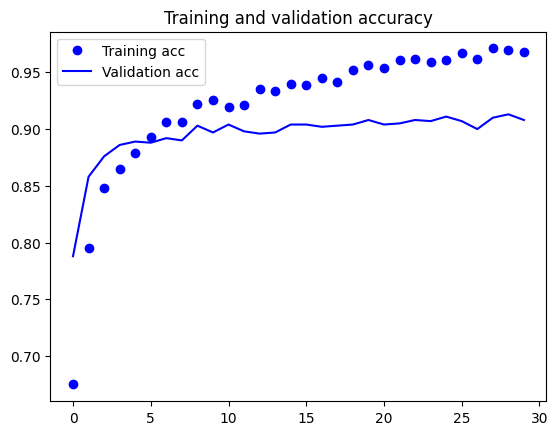

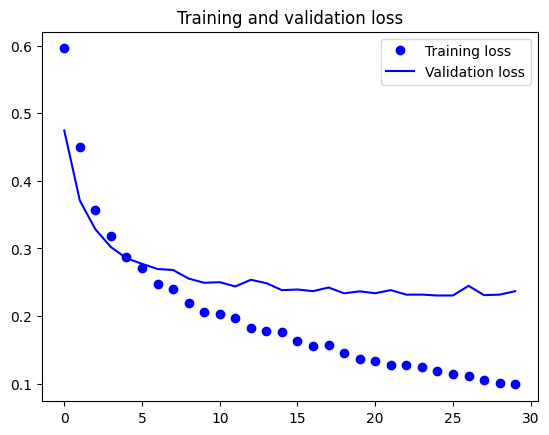

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [22]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
100/100 - 22s - 220ms/step - acc: 0.6880 - loss: 0.5989 - val_acc: 0.8190 - val_loss: 0.4517
Epoch 2/30
100/100 - 38s - 379ms/step - acc: 0.7855 - loss: 0.4837 - val_acc: 0.8480 - val_loss: 0.3848
Epoch 3/30
100/100 - 21s - 207ms/step - acc: 0.8170 - loss: 0.4245 - val_acc: 0.8550 - val_loss: 0.3445
Epoch 4/30
100/100 - 19s - 190ms/step - acc: 0.8210 - loss: 0.4081 - val_acc: 0.8640 - val_loss: 0.3167
Epoch 5/30
100/100 - 17s - 173ms/step - acc: 0.8435 - loss: 0.3727 - val_acc: 0.8790 - val_loss: 0.2951
Epoch 6/30
100/100 - 21s - 207ms/step - acc: 0.8415 - loss: 0.3682 - val_acc: 0.8860 - val_loss: 0.2858
Epoch 7/30
100/100 - 18s - 179ms/step - acc: 0.8455 - loss: 0.3514 - val_acc: 0.8900 - val_loss: 0.2808
Epoch 8/30
100/100 - 17s - 174ms/step - acc: 0.8405 - loss: 0.3537 - val_acc: 0.8870 - val_loss: 0.2713
Epoch 9/30
100/100 - 19s - 190ms/step - acc: 0.8475 - loss: 0.3452 - val_acc: 0.8800 - val_loss: 0.2798
Epoch 10/30
100/100 - 17s - 175ms/step - acc: 0.8520 - loss: 0.3

In [24]:
model.save('cats_and_dogs_small_3.keras')

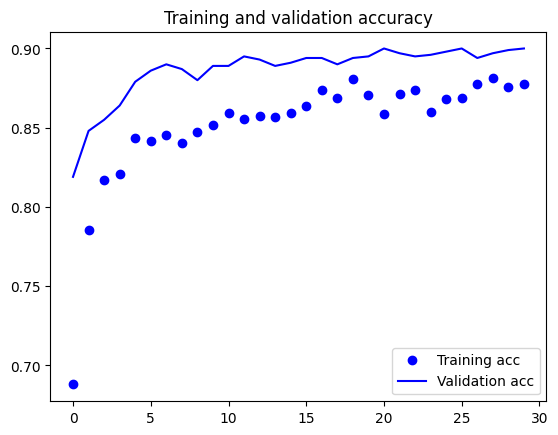

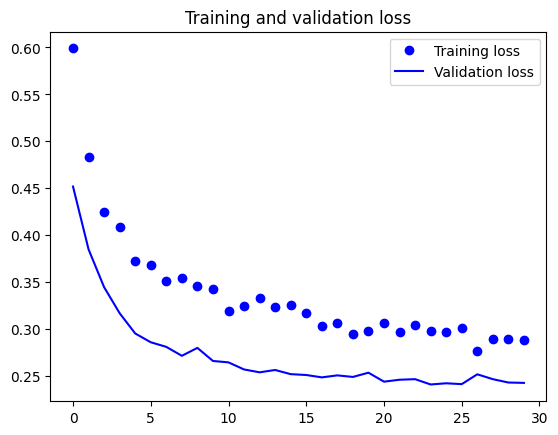

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [27]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [29]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step - acc: 0.8730 - loss: 0.2964 - val_acc: 0.9060 - val_loss: 0.2307
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 183ms/step - acc: 0.8952 - loss: 0.2666 - val_acc: 0.9080 - val_loss: 0.2115
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 202ms/step - acc: 0.8942 - loss: 0.2369 - val_acc: 0.9170 - val_loss: 0.1998
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - acc: 0.9158 - loss: 0.2089 - val_acc: 0.9210 - val_loss: 0.1935
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - acc: 0.9109 - loss: 0.2149 - val_acc: 0.9210 - val_loss: 0.1915
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step - acc: 0.9189 - loss: 0.1908 - val_acc: 0.9070 - val_loss: 0.2343
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - acc: 0.9195 - loss: 0.1862 - val_acc: 0.9290 - val_loss: 0.1922
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - acc: 0.9363 - loss: 0.1566 - val_acc: 0.9120 - val_loss: 0.2210
Epoch 9/100
100/100 ━━━━

In [30]:
model.save('cats_and_dogs_small_4.keras')

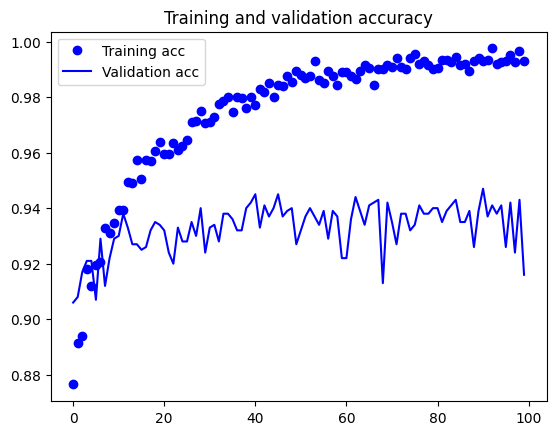

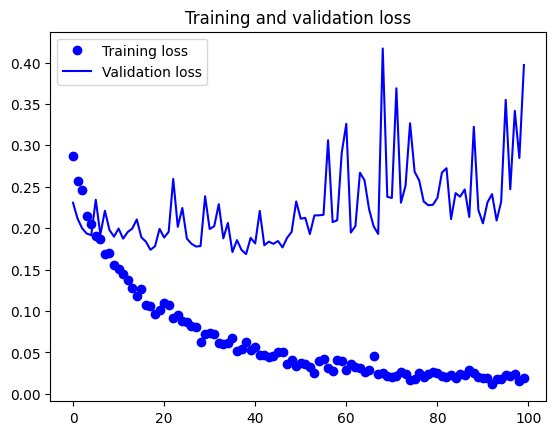

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

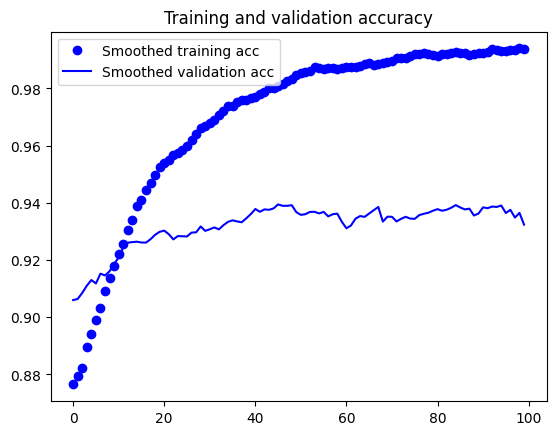

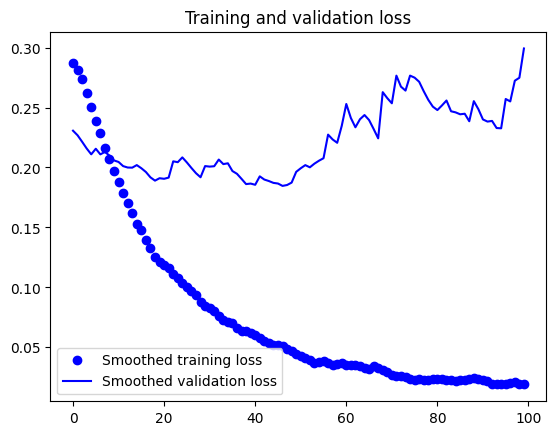

In [32]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - acc: 0.9232 - loss: 0.4423
test acc: 0.9210000038146973


In [47]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_3.keras')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,910,020 (72.14 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2,097,667 (8.00 MB)

In [48]:
from keras.preprocessing import image

img_path = 'train/Cat/0.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


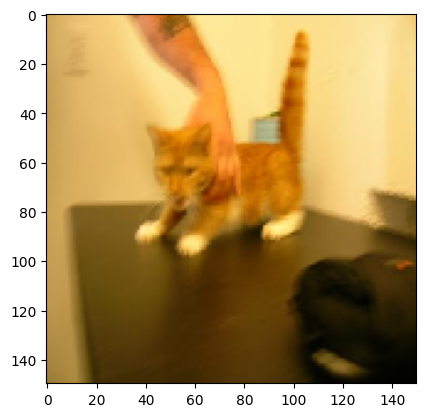

In [49]:
plt.imshow(img_tensor[0])
plt.show()

In [61]:
pred = model.predict(img_tensor)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[0.01498374]], dtype=float32)

In [71]:
import requests
from PIL import Image
from io import BytesIO

def download_image_from_url(url, save_path):
    # Отправляем HTTP-запрос по указанному URL
    response = requests.get(url)

    # Проверяем, успешно ли выполнен запрос
    if response.status_code == 200:
        # Открываем изображение с помощью PIL
        image = Image.open(BytesIO(response.content))

        # Сохраняем изображение локально
        image.save(save_path)
        print(f"Изображение успешно сохранено по пути: {save_path}")
    else:
        print("Не удалось загрузить изображение. Проверьте URL.")

image_url = 'https://avatars.mds.yandex.net/i?id=1d12b98fbee4975bbe01e42204bad216-4289847-images-thumbs&n=13'
save_path = 'elephant_image.jpg'
download_image_from_url(image_url, save_path)

Изображение успешно сохранено по пути: elephant_image.jpg


In [72]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the VGG16 model pre-trained on ImageNet
model = VGG16(weights='imagenet')

def load_and_preprocess_image(img_path):
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (224, 224))

    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)

    img_array = preprocess_input(img_array)

    return img, img_array

def predict_and_visualize(img_path):
    original_img, img_array = load_and_preprocess_image(img_path)


    preds = model.predict(img_array)
    decoded_preds = decode_predictions(preds, top=1)[0]
    print(f'Prediction: {decoded_preds[0][1]} with confidence {decoded_preds[0][2]}')

    last_conv_layer = model.get_layer('block5_conv3')
    heatmap_model = tf.keras.Model([model.inputs], [last_conv_layer.output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = heatmap_model(img_array)
        class_output = preds[:, np.argmax(preds[0])]
        grads = tape.gradient(class_output, last_conv_layer_output)
        pooled_grads = tf.keras.backend.mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., np.newaxis]
    heatmap = np.squeeze(heatmap)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)

    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * 0.4 + original_img

    output_path = 'elephant_cam.jpg'
    cv2.imwrite(output_path, superimposed_img)
    print(f'Heatmap saved to {output_path}')

predict_and_visualize(save_path)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Prediction: tusker with confidence 0.4392499327659607


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_306']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


Heatmap saved to elephant_cam.jpg


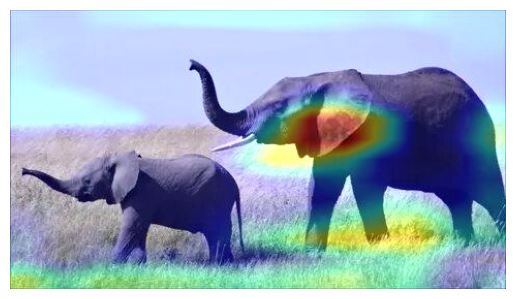

In [74]:
img_cam = cv2.imread('elephant_cam.jpg')
img_cam = cv2.cvtColor(img_cam, cv2.COLOR_BGR2RGB)

plt.imshow(img_cam)
plt.axis('off')
plt.show()